# **Time Series Analysis Basics**

Across industries, organizations commonly use time series data, which means any information collected over a regular interval of time, in their operations. Examples include daily stock prices, energy consumption rates, social media engagement metrics and retail demand, among others. Analyzing time series data yields insights like trends, seasonal patterns and forecasts into future events that can help generate profits. For example, by understanding the seasonal trends in demand for retail products, companies can plan promotions to maximize sales throughout the year.

When analyzing time series data, you should undertake a number of steps. First, you need to check for stationarity and autocorrelation. Stationarity is a way to measure if the data has structural patterns like seasonal trends. Autocorrelation occurs when future values in a time series linearly depend on past values. You need to check for both of these in time series data because they’re assumptions that are made by many widely used methods in time series analysis. For example, the autoregressive integrated moving average (ARIMA) method for forecasting time series assumes stationarity. Further, linear regression for time series forecasting assumes that the data has no autocorrelation. Before conducting these processes, then, you need to know if the data is viable for the analysis.

During a time series analysis, you also need to perform trend decomposition and forecast future values. Decomposition allows you to visualize trends in your data, which is a great way to clearly explain their behavior. Finally, forecasting allows you to anticipate future events that can aid in decision making. You can use many different techniques for time series forecasting, but here, we will discuss autoregressive integrated moving average (ARIMA).
by - **Adarche Pierre**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/akmalatnamal/davlab13/main/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Convert the Month Column as Index of the DataFrame
df["Month"] = pd.to_datetime(df["Month"])
df=df.set_index('Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


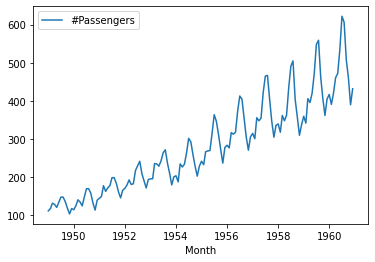

In [ ]:
# Using Seaborn Draw a line plot for the DataFrame
import seaborn as sns
sns.lineplot(data=df)


Stationarity is a key part of time series analysis. Simply put, stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).

We will use the Dickey Fuller test to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.

These values allow us to test the degree to which present values change with past values. If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

Let’s test for stationarity in our airline passenger data. To start, let’s calculate a seven-month rolling mean:

In [ ]:
# Calculate the 7th Month Rolling mean and standard deviation
# Use df.rolling(7).mean() to calculate the 7th month rolling mean and std in the same way
mean = df.rolling(7).mean()
print(mean)
std = df.rolling(7).std()
print(std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   500.857143
1960-09-01   517.571429
1960-10-01   523.571429
1960-11-01   513.428571
1960-12-01   507.714286

[144 rows x 1 columns]
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    89.523607
1960-09-01    75.403044
1960-10-01    67.510140
1960-11-01    82.210821
1960-12-01    86.830706

[144 rows x 1 columns]


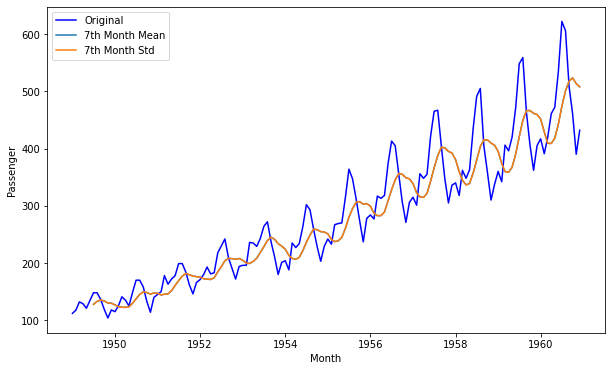

In [ ]:
# Plot the Original Passengers data, 7th month rolling mean and 7th month rolling std in one plot
# Don't forget to draw legends on the plot

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df ,color='blue',label='Original')
ax.plot(mean.index,mean['#Passengers'],label='7th Month Mean')
ax.plot(std.index,mean['#Passengers'],label='7th Month Std')
plt.xlabel('Month')
plt.ylabel('Passenger')
plt.legend(loc='best')
plt.show()


In [ ]:
# Import Augmented Dicky Fuller Method
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Create the Object of Dicky Fuller Method
adft = adfuller(df['#Passengers'],autolag="AIC")

In [ ]:
# Here are the indices of values returned in Augmented Dicky Fuller Test
# The values returned are in metric for specific index of returned object

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


Is the Data Statiionary?


**Your Answer Here**

Important Note: Please remember that data will not be stationary if p-value in dicky fuller test is greater than 5% and test statistic is greater than critical value.

In [ ]:
# Check Autocorrelation for different months as

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
for i in range(1,10):
  autocorrelation_lag = df['#Passengers'].autocorr(lag=i)
  print(autocorrelation_lag) 

# Above code will provide you the autocorrelation with 6 months lag
# Higher value of autocorrelation represents the trends in the data





0.9601946480498523
0.8956753113926396
0.837394765081794
0.7977346989350624
0.7859431491184304
0.7839187959206183
0.7845921291388301
0.7922150472595747
0.8278519011167601


**Forecasting**

Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of passengers, which allows us to forecast future values in terms of a linear combination of past values. We will use the auto_arima package, which will allow us to forgo the time consuming process of hyperparameter tuning.

First, let’s split our data for training and testing and visualize the split:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


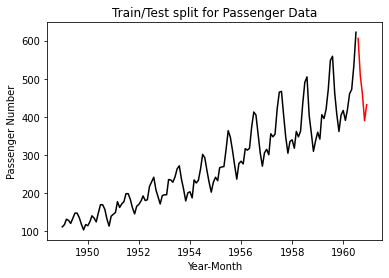

In [ ]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()


**Explain the working of above code here.**

In [ ]:
# Install PMDARIMA
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.9 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=0cc8c816b211dde9a918bce6f50d333ec6c286ce51d3df6809e0a82220223674
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
# Use the Auto ARIMA for forecasting

from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

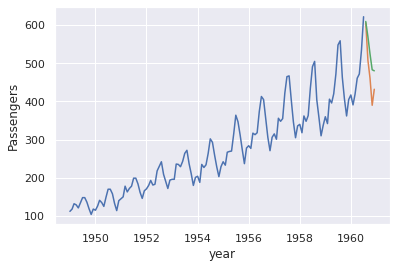

In [ ]:
# Now Plot the Forecasted Value with the help of code used in two cells above.
# Your Code Here
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(forecast, label='Prediction')
plt.xlabel("year")
plt.ylabel("Passengers")
plt.show()

In [ ]:
# Print Root MeanSquarred Error for the Forecast
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  61.36470008138933
